Exploratory Data Analysis for Shell.ai Hackathon 2025
=====================================================
-----------------------------------------------------
# Importing libraries and Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

sns.set_theme(style="whitegrid", palette="deep")
df = pd.read_csv('train.csv')

# Basic information

In [2]:
print(f"Shape: {df.shape}")
df.info()
display(df.head())

Shape: (2000, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null  

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


# Check for missing values

In [3]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if missing.empty:
    print("✅ No missing values.")
else:
    print("⚠️ Missing values detected:")
    print(missing)

✅ No missing values.


# Basic statistics

In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Component1_fraction,2000.0,0.180690,0.163200,0.000000,0.030000,0.140000,0.290000,0.500000
Component2_fraction,2000.0,0.182910,0.163704,0.000000,0.040000,0.150000,0.300000,0.500000
Component3_fraction,2000.0,0.179820,0.166283,0.000000,0.020000,0.140000,0.290000,0.500000
Component4_fraction,2000.0,0.342090,0.141119,0.010000,0.220000,0.350000,0.500000,0.500000
Component5_fraction,2000.0,0.114490,0.080219,0.000000,0.050000,0.120000,0.180000,0.290000
...,...,...,...,...,...,...,...,...
BlendProperty6,2000.0,-0.003497,1.009126,-2.808210,-0.697379,-0.011649,0.695182,3.433292
BlendProperty7,2000.0,-0.013568,1.000613,-2.994571,-0.622453,0.133470,0.704130,3.293228
BlendProperty8,2000.0,-0.017236,0.998759,-3.621080,-0.725564,-0.001548,0.684894,3.340657
BlendProperty9,2000.0,-0.001507,1.001096,-3.292727,-0.702384,-0.002604,0.706084,3.276199


# Check for duplicates

In [5]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


# Correlation heatmap for target BlendProperties

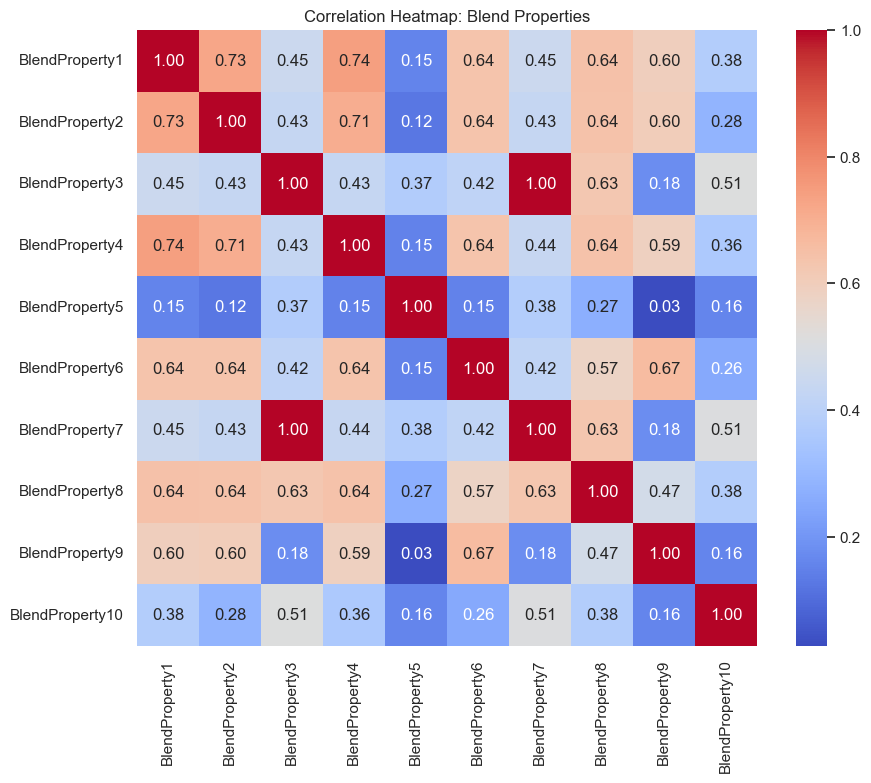

In [6]:
blend_cols = [col for col in df.columns if 'BlendProperty' in col]
plt.figure(figsize=(10, 8))
sns.heatmap(df[blend_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap: Blend Properties")
plt.show()

# Distribution plots for target variables

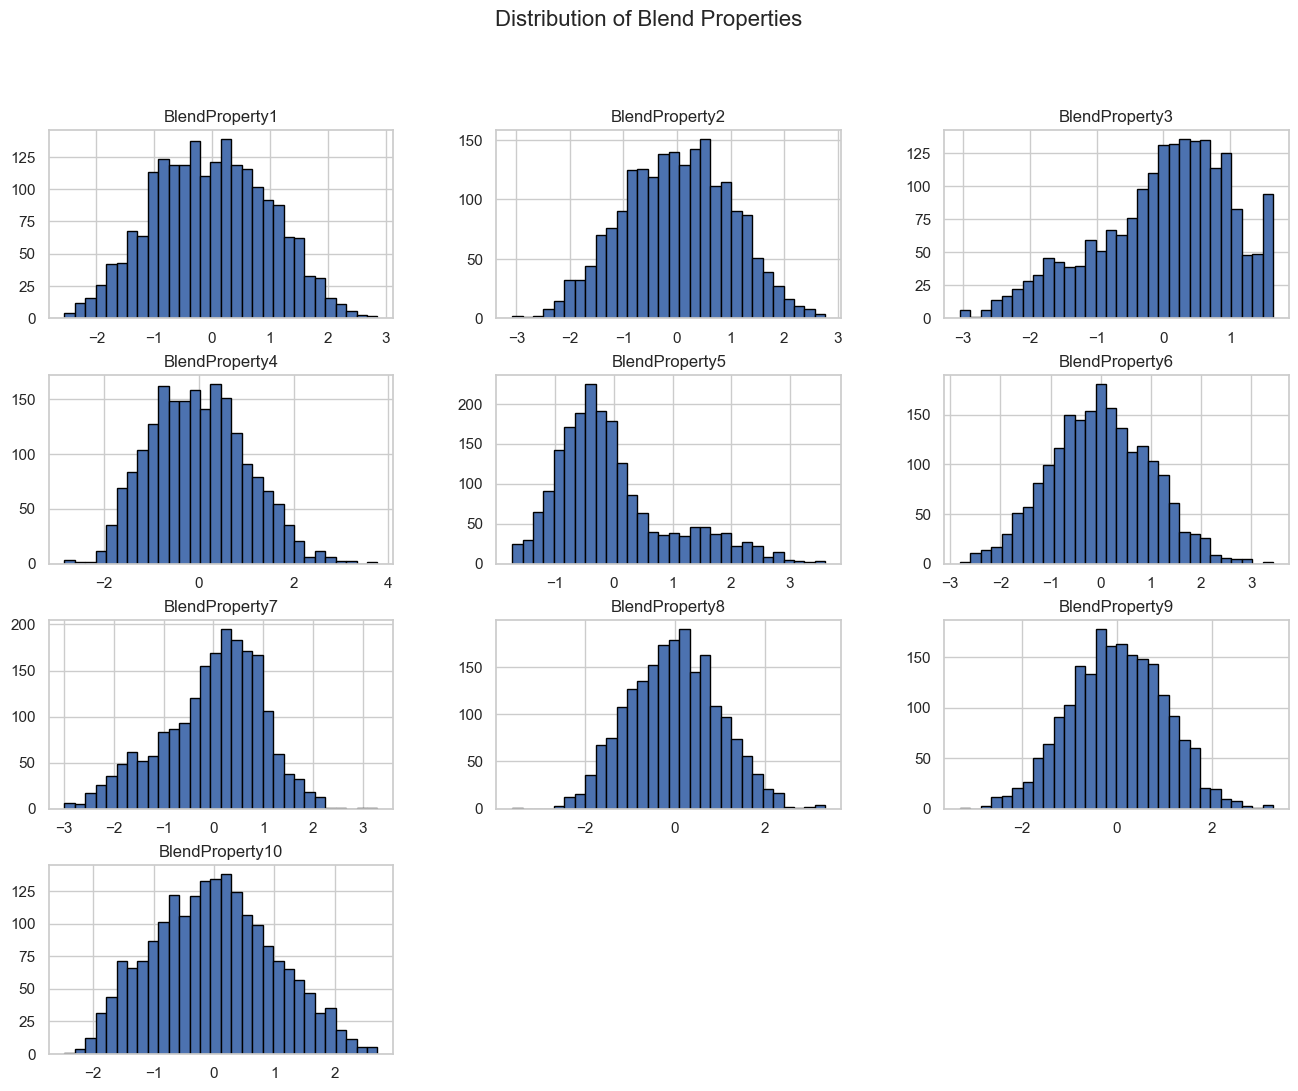

In [7]:
df[blend_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Blend Properties", fontsize=16)
plt.show()

# Skewness analysis for target variables

In [8]:
skewness = df[blend_cols].apply(skew).sort_values(ascending=False)
print("Skewness of target Blend Properties:")
print(skewness)

Skewness of target Blend Properties:
BlendProperty5     1.044537
BlendProperty4     0.249158
BlendProperty10    0.142735
BlendProperty6     0.085268
BlendProperty8     0.069992
BlendProperty1     0.058775
BlendProperty9    -0.001399
BlendProperty2    -0.044150
BlendProperty7    -0.457442
BlendProperty3    -0.575921
dtype: float64


# Check for highly correlated features (>0.95)

In [9]:
corr_matrix = df.corr().abs()
high_corr = np.where(corr_matrix > 0.95)
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print(f"Highly correlated feature pairs (>0.95): {high_corr_pairs}")

Highly correlated feature pairs (>0.95): [('BlendProperty3', 'BlendProperty7')]


# Lean summary EDA table

In [10]:
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'missing': df.isnull().sum(),
    'unique': df.nunique(),
    'mean': df.mean(numeric_only=True),
    'std': df.std(numeric_only=True),
    'min': df.min(numeric_only=True),
    'max': df.max(numeric_only=True)
})

display(summary)

,dtype,missing,unique,mean,std,min,max
Component1_fraction,float64,0,51,0.180690,0.163200,0.000000,0.500000
Component2_fraction,float64,0,51,0.182910,0.163704,0.000000,0.500000
Component3_fraction,float64,0,51,0.179820,0.166283,0.000000,0.500000
Component4_fraction,float64,0,50,0.342090,0.141119,0.010000,0.500000
Component5_fraction,float64,0,30,0.114490,0.080219,0.000000,0.290000
...,...,...,...,...,...,...,...
BlendProperty6,float64,0,1913,-0.003497,1.009126,-2.808210,3.433292
BlendProperty7,float64,0,1902,-0.013568,1.000613,-2.994571,3.293228
BlendProperty8,float64,0,1919,-0.017236,0.998759,-3.621080,3.340657
BlendProperty9,float64,0,1933,-0.001507,1.001096,-3.292727,3.276199


# Outlier Check Using IQR Method

In [13]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Compute IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers outside 1.5 * IQR
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count rows with at least one outlier feature
outlier_rows = outliers_iqr.any(axis=1).sum()
print(f"Outlier Check: {outlier_rows} rows have at least one feature outside 1.5 * IQR.")

Outlier Check: 599 rows have at least one feature outside 1.5 * IQR.
